
<h1 style="font-size: 250%">Single-mixed refrigerant (SMR) natural gas liquefaction process simulation optimization <a href="https://doi.org/10.1016/j.ces.2021.116699" title="SMR optimization paper">[1]</a> </h1>

<hr>

<h2 style="font-size: 200%">SMR process description</h2>

<spam style="font-size: 150%">The single-mixed refrigerant natural gas liquefaction process consists of using a multi-component refrigerant operating in a refrigeration cycle to produce heat sink to cool down and liquefy the natural gas stream, as illustrated in the figure below. The refrigeration cycle includes a four-stage compression system with intermediate cooling and phase separation for possible condensate. The liquid phase is compressed in pumps and the vapor phase in the compressors. No phase mixing is considered, which means that the refrigerant heavy condensate is mixed together and goes through the hot pass in the multi-stream heat exchanger separately from the light vapor phase. Then, the streams are mixed back together in the cold pass inside the cryogenic heat exchanger as they vaporize.</spam>

<br/>
<br/>
<img src="pfd_smr.png" alt="process flow diagram image" style="height: 400px"/>
<br/>
<br/>

<h2 style="font-size: 200%"> SMR process simulation</h2>

<spam style="font-size: 150%">The described single-mixed refrigerant natural gas liquefaction process is rather difficult to model and simulate mainly because it involves Pinch-like calculations in each multi-stream heat exchangers (MSHE) considering phase change, cryogenic conditions, and non-ideal mixtures. In other words, these heat exchangers are discretized in temperature segments, where vapor-liquid equilibrium calculations are performed to determine the temperature of every stream and, therefore, the temperature profiles in these operation units. For the sake of process feasibility considering the Second Law of Thermodynamics, the temperatures of hot streams have to be effectively higher than the cold ones throughout the heat exchangers.
For rigorous calculations, this process is modeled and simulated in DWSIM v7.0 using Peng-Robinson equation of state, which is appropriate for hydrocarbons mixtures, such as the natural gas and the refrigerant mixtures. The minimum internal temperature approach is calculated using the Python Script in DWSIM. See the simulation ``SMR_2exp_phaseSep_MSHE_MITApy.dwxmz`` for more details.</spam>

<br />
<br />
<img src="pfd_smr_dwsim.png" alt="process flow diagram image" style="height: 400px"/>
<br />
<br />

<h2 style="font-size: 200%">SMR process optimization problem</h2>

<spam style="font-size: 150%">Knowing that the work consumption is the most relevant spending in the natural gas liquefaction process, then the design problem is to find $\textbf{x}^*\in \mathbb{R}^n$ that minimizes the following optimization problem</spam>

<spam style="font-size: 150%">

$$ \min_{\textbf{x}\in \mathcal{D}}\ \ f(\textbf{x})=\frac{\sum_{p\in PM}{W_p(\textbf{x})}}{\dot{m}_{NG}} $$
$$ \text{s.t.} \ \ g(\textbf{x})=3 - MITA(\textbf{x})\le 0$$
$$ \mathcal{D}=[\textbf{x}^{lb},\ \textbf{x}^{ub}], $$
</spam>

<spam style="font-size: 150%"> in which, for a given $\textbf{x}$, $W_p(\textbf{x})$ is the work consumption of the pressure manipulator unit $p$ in the set of compressors and pumps $PM$, $MITA(\textbf{x})$ is the minimum internal temperature approach in the MSHEs, $\mathcal{D}$ is a box constraint for the decision variables bounded by $\textbf{x}^{lb}$ and $\textbf{x}^{ub}$, and $\dot{m}_{LNG}$ is the mass flow rate of the natural gas stream. Therefore, the objective function $f$ in this optimization problem is the specific work consumed in the refrigeration cycle with respect to the mass flow rate of liquefied natural gas (LNG). Notice that the value of $W_p(\textbf{x})$ as well as $MITA(\textbf{x})$ are obtained in the black-box chemical process simulator, and so are $f(\textbf{x})$ and $g(\textbf{x})$. Then, $f(\textbf{x})$ and $g(\textbf{x})$ are known only at sampled points and make the optimization problem equivalent to equation above.</spam>

In [1]:
import numpy as np
from scipy import optimize
from pprint import pprint

import os 
dir_path = globals()['_dh'][0]
print(dir_path)
os.chdir(dir_path)
os.chdir("../..")
print(os.getcwd())

from pyDWSIMopt.interface import Simulation
from pyDWSIMopt.opt_problem import *

c:\Users\lfsfr\Desktop\pyDWSIMopt\examples\SMR_LNG
c:\Users\lfsfr\Desktop\pyDWSIMopt


In [2]:
# Loading DWSIM simulation into Python (Simulation object)
sim_smr = Simulation(path2sim= os.getcwd() + "\\examples\\SMR_LNG\\SMR_2exp_phaseSep_MSHE_MITApy.dwxmz", 
                     path2dwsim = "C:\\Users\\lfsfr\\AppData\\Local\\DWSIM7\\")
sim_smr.savepath = os.getcwd() + "\\examples\\SMR_LNG\\SMR_2exp_phaseSep_MSHE_MITApy2.dwxmz"
sim_smr.Add_refs()

# Instanciate automation manager object
from DWSIM.Automation import Automation2
if ('interf' not in locals()):    # create automation manager
    interf = Automation2()

# Connect simulation in sim.path2sim
sim_smr.Connect(interf)

added refs


FileNotFoundException: Não foi possível carregar arquivo ou assembly 'System.Buffers, Version=4.0.2.0, Culture=neutral, PublicKeyToken=cc7b13ffcd2ddd51' ou uma de suas dependências. O sistema não pode encontrar o arquivo especificado.
   em SkiaSharp.SKManagedStream.CopyTo(SKWStream destination)
   em SkiaSharp.SKManagedStream.ToMemoryStream()
   em SkiaSharp.SKTypeface.FromStream(SKStreamAsset stream, Int32 index)
   em DWSIM.Drawing.SkiaSharp.GraphicsSurface..ctor() na C:\Users\Daniel\source\repos\DanWBR\dwsim\DWSIM.Drawing.SkiaSharp\GraphicsSurface\DesignSurface.vb:linha 87
   em DWSIM.FlowsheetBase.FlowsheetBase..ctor() na C:\Users\Daniel\source\repos\DanWBR\dwsim\DWSIM.FlowsheetBase\FlowsheetBase.vb:linha 42
   em DWSIM.UI.Forms.Flowsheet.InitializeComponent() na C:\Users\Daniel\source\repos\DanWBR\dwsim\DWSIM.UI.Desktop.Forms\Forms\Flowsheet\Flowsheet.eto.cs:linha 161
   em DWSIM.Automation.Automation2.LoadFlowsheet(String filepath) na C:\Users\Daniel\source\repos\DanWBR\dwsim\DWSIM.Automation\Interface.cs:linha 158

In [9]:
# Initial simulation setup
sim_smr.fobj = lambda x: fobj_smr(sim_smr, x, dtmin=3)

# Initial guess of optimization
x0 = np.array( [0.25/3600, 0.70/3600, 1.0/3600, 1.10/3600, 1.80/3600, 2.50e5, 50.00e5, -60+273.15] )

# Testing for simulation at x0
sumW, mita = sim_smr.fobj(1.01*x0)
print(sim_smr.x,
    sim_smr.f,
    sim_smr.g)

# Test saving simulation at x0 in 'savepath'
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet,sim_smr.savepath,True)

# Inspecting simulation object
pprint(vars(sim_smr))

[6.94444444e-05 1.94444444e-04 2.77777778e-04 3.05555556e-04
 5.00000000e-04 2.50000000e+05 5.00000000e+06 2.13150000e+02] 0.38910439091403015 -1.7888787542232762
{'f': 0.38910439091403015,
 'flowsheet': <DWSIM.UI.Desktop.Shared.Flowsheet object at 0x0000022CAAF35A90>,
 'fobj': <function <lambda> at 0x0000022CC2901430>,
 'g': -1.7888787542232762,
 'interface': <DWSIM.Automation.Automation2 object at 0x0000022CAAF2F940>,
 'path': 'c:\\Users\\lfsfr\\Desktop\\pyDWSIMopt\\examples\\SMR_LNG\\SMR_2exp_phaseSep_MSHE_MITApy.dwxmz',
 'path2dwsim': 'C:\\Users\\lfsfr\\AppData\\Local\\DWSIM7\\',
 'savepath': 'c:\\Users\\lfsfr\\Desktop\\pyDWSIMopt\\examples\\SMR_LNG\\SMR_2exp_phaseSep_MSHE_MITApy2.dwxmz',
 'x': array([6.94444444e-05, 1.94444444e-04, 2.77777778e-04, 3.05555556e-04,
       5.00000000e-04, 2.50000000e+05, 5.00000000e+06, 2.13150000e+02])}


In [4]:
# Setup for local optimization

# convergence tolerances
xtol=0.01
ftol=0.01
maxiter=5 # +- 20 seconds per iteration

# decision variables bounds
bounds_raw = np.array( [0.6*np.asarray(x0), 1.4*np.asarray(x0)] )   # 50 % around base case
bounds_raw[0][-1] = 133     # precool temperature low limit manually
bounds_raw[1][-1] = 273     # precool temperature upper limit manually
regularizer = np.array([1e4,1e4,1e4,1e4,1e4, 1e-5, 1e-6, 1e-2])     # regularizer for magnitude order of 1e0
bounds_reg = regularizer*bounds_raw
bounds = optimize.Bounds(bounds_reg[0], bounds_reg[1])

# objective and constraints lambda definitions
f = lambda x: sim_smr.fobj(np.asarray(x)/regularizer)[0]
g = lambda x: sim_smr.fobj(np.asarray(x)/regularizer)[1]
nonlinear_constraint = optimize.NonlinearConstraint(g, -np.inf, 0, jac='2-point', hess=optimize.BFGS())


In [6]:
# Local optimization with trust-region -> working to some extent
print("starting local optimization")
result = optimize.minimize( f, np.asarray(x0)*regularizer, 
            method='trust-constr', jac='2-point', hess=optimize.BFGS(),
            constraints=[nonlinear_constraint], bounds=bounds, callback=None,
            options={'verbose': 3, 
                     'xtol': xtol, 
                     'maxiter': 1*maxiter, 
                     'finite_diff_rel_step': None, 
                     'initial_tr_radius': 0.1} )

starting local optimization
0.35959228847442887
4.788879286408076
6.4784670868400696
0.3595922847216412
4.788879273461021
6.478467086839245
0.35959229175997937
4.788879531863046
6.478467187296047
0.3595922881229123
4.788879524957338
6.478467187295095
0.35959229003465965
4.788880192113453
6.478467188879307
0.35959228647684144
4.788880211965676
6.478467188879648
0.3595922906812577
4.788879444004095
6.478467188882675
0.35959228703203344
4.788879444003982
6.478467188882092
0.35959228847442926
4.788879286407564
6.478467086839572
0.3595922847216398
4.788879273462754
6.478467086839657
0.3595922917599783
4.7888795318649215
6.47846718729744
0.35959228812291116
4.788879524958588
6.478467187295649
0.35959229003465965
4.788880192113567
6.47846718887962
0.35959228647684144
4.788880211965676
6.478467188879648
| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |barrier param|CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|----

In [7]:
# printing results from local optimization
print(f(result.x))
print(g(result.x))
print(sim_smr.fobj(result.x/regularizer))
print(result.x)

# saving results of local optimization
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)

0.3635056992000127
5.479697983260081
6.637777549225376
0.36350570130405635
5.479697983261104
6.637777549225646
0.3933183062954975
-2.4796979832611044
(0.3933183062954975, -2.4796979832611044)
[0.69444444 1.94444444 2.77777778 3.05555556 5.         2.44253593
 5.02329268 2.18311278]


In [14]:
# Global optimization with Differential Evolution
# be mindful: +- 13s per popsize (n fevals) per iteration
result = optimize.differential_evolution(f, bounds, constraints=[nonlinear_constraint], 
            maxiter=40, popsize=1, seed=420, disp=True, polish=False)

differential_evolution step 1: f(x)= 0.370881
differential_evolution step 2: f(x)= 0.370881
differential_evolution step 3: f(x)= 0.370881
differential_evolution step 4: f(x)= 0.370881
differential_evolution step 5: f(x)= 0.370881
differential_evolution step 6: f(x)= 0.370881
differential_evolution step 7: f(x)= 0.370881
differential_evolution step 8: f(x)= 0.370881
differential_evolution step 9: f(x)= 0.370881
differential_evolution step 10: f(x)= 0.370881
differential_evolution step 11: f(x)= 0.370881
differential_evolution step 12: f(x)= 0.370881
differential_evolution step 13: f(x)= 0.370881
differential_evolution step 14: f(x)= 0.370881
differential_evolution step 15: f(x)= 0.370881
differential_evolution step 16: f(x)= 0.370881
differential_evolution step 17: f(x)= 0.370881
differential_evolution step 18: f(x)= 0.370881
differential_evolution step 19: f(x)= 0.370881
differential_evolution step 20: f(x)= 0.370881
differential_evolution step 21: f(x)= 0.359367
differential_evolution

In [16]:
# printing results of global optimization with Differential Evolution
print(f(result.x))
print(g(result.x))
print(result.x)
pprint(result)

# saving results of local optimization with Differential Evolution
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)

0.3223810730962841
-1.3706464272561334
(0.3223810730962841, 4.370646427256133)
[0.40840202 1.06736134 3.61644657 2.36214307 6.23020183 1.89382445
 2.81772401 2.27453916]
{'constr': [array([0.])],
 'constr_violation': 0.0,
 'fun': 0.3223810725605125,
 'maxcv': 0.0,
 'message': 'Maximum number of iterations has been exceeded.',
 'nfev': 145,
 'nit': 40,
 'success': False,
 'x': array([0.40840202, 1.06736134, 3.61644657, 2.36214307, 6.23020183,
       1.89382445, 2.81772401, 2.27453916])}


In [5]:
# Global optimization with PSO
from sko.PSO import PSO

f_pen = lambda x: fpen_barrier(sim_smr,x/regularizer)
result_pso = PSO(func=f_pen, n_dim=8, pop=8*3, max_iter=8*5, lb=bounds_reg[0], ub=bounds_reg[1], verbose=True)
result_pso.record_mode = True
result_pso.run()

One or more errors occurred.
   at DWSIM.FlowsheetSolver.FlowsheetSolver._Closure$__45-1._Lambda$__1() in C:\Users\Daniel\source\repos\DanWBR\dwsim\DWSIM.FlowsheetSolver\FlowsheetSolver.vb:line 1186
   at System.Threading.Tasks.Task.Execute()
One or more errors occurred.
   at DWSIM.FlowsheetSolver.FlowsheetSolver._Closure$__45-1._Lambda$__1() in C:\Users\Daniel\source\repos\DanWBR\dwsim\DWSIM.FlowsheetSolver\FlowsheetSolver.vb:line 1186
   at System.Threading.Tasks.Task.Execute()
One or more errors occurred.
   at DWSIM.FlowsheetSolver.FlowsheetSolver._Closure$__45-1._Lambda$__1() in C:\Users\Daniel\source\repos\DanWBR\dwsim\DWSIM.FlowsheetSolver\FlowsheetSolver.vb:line 1186
   at System.Threading.Tasks.Task.Execute()
One or more errors occurred.
   at DWSIM.FlowsheetSolver.FlowsheetSolver._Closure$__45-1._Lambda$__1() in C:\Users\Daniel\source\repos\DanWBR\dwsim\DWSIM.FlowsheetSolver\FlowsheetSolver.vb:line 1186
   at System.Threading.Tasks.Task.Execute()
Iter: 0, Best fit: [0.471127

(array([0.42465283, 1.16666667, 3.34429772, 3.11185362, 7.        ,
        2.51029718, 3.05335018, 2.45513263]),
 array([0.29621381]))

In [6]:
# printing results of global optimization with Differential Evolution
xpso = np.array([0.42701477, 1.16916054, 3.34329195, 3.09604705, 7.,         2.51994937, 3.11156029, 2.45091947])
print(sim_smr.fobj(xpso/regularizer))
print(xpso)
print(bounds_reg)

# saving results of local optimization with Differential Evolution
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)

(0.2970047170492142, -0.0037319685783074874)
[0.42701477 1.16916054 3.34329195 3.09604705 7.         2.51994937
 3.11156029 2.45091947]
[[0.41666667 1.16666667 1.66666667 1.83333333 3.         1.5
  3.         1.33      ]
 [0.97222222 2.72222222 3.88888889 4.27777778 7.         3.5
  7.         2.73      ]]


0.2962138160461951
-0.010032184679630518
[0.42465283 1.16666667 3.34429772 3.11185362 7.         2.51029718
 3.05335018 2.45513263]
0.2962138160461951


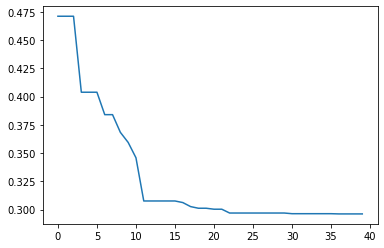

In [8]:
import matplotlib.pyplot as plt

print(f(result_pso.gbest_x))
print(g(result_pso.gbest_x))
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)
print(result_pso.gbest_x)
pprint(result_pso)
print(f_pen(result_pso.gbest_x))

plt.plot(result_pso.gbest_y_hist)
plt.show()